In [3]:
# Import all required libraries

import os 
import json
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
# from pandasql import sqldf
import numpy as np
# import nltk
import re
# from wordcloud import WordCloud
import networkx as nx

In [15]:
nodes = pd.read_csv('./Data/nodes.csv')
edges = pd.read_csv('./Data/edges.csv')
tracks = pd.read_csv('./Data/tracks.csv')

In [20]:
nodes[nodes['name'] == 'Beyonce']

,spotify_id,name,followers,popularity,genres,chart_hits


In [24]:
nodes[nodes.spotify_id == '3fMbdgg4jU18AjLCKBhRSm']

,spotify_id,name,followers,popularity,genres,chart_hits
4735,3fMbdgg4jU18AjLCKBhRSm,Michael Jackson,24070351.0,81,"['pop', 'r&b', 'soul']","['us (2)', 'gb (4)', 'ar (1)', 'au (3)', 'at (..."


In [48]:
nodes.head()

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']


In [14]:
edges[(edges['id_0'] == '6eUKZXaKkcviH0Ku9w2n3V') | (edges['id_1'] == '6eUKZXaKkcviH0Ku9w2n3V')]

,id_0,id_1
4522,3egWSWp7Y4FyCKIyvXbw7L,6eUKZXaKkcviH0Ku9w2n3V
6222,3m5qlPf2OkihLz3dRYnkPA,6eUKZXaKkcviH0Ku9w2n3V
6648,0mbgkaYR8KNUb5s3s1yYHG,6eUKZXaKkcviH0Ku9w2n3V
11617,0NbfKEOTQCcwd6o7wSDOHI,6eUKZXaKkcviH0Ku9w2n3V
12849,6WjX4pepHwXa85B9KMk0PY,6eUKZXaKkcviH0Ku9w2n3V
...,...,...
295506,3c9CUpHeB5BCQOHp8uiPzY,6eUKZXaKkcviH0Ku9w2n3V
296347,5uvOG0MwnD2ANrxNBUPtNr,6eUKZXaKkcviH0Ku9w2n3V
296899,6eUKZXaKkcviH0Ku9w2n3V,7DMveApC7UnC2NPfPvlHSU
297010,3q7HBObVc0L8jNeTe5Gofh,6eUKZXaKkcviH0Ku9w2n3V


In [45]:
nodes_400 = nodes.iloc[:100]
edges_400 = edges.iloc[:100]

In [46]:
G = nx.Graph()

for id in nodes_400['spotify_id']:
    G.add_node(id)

for i, ids in edges_400.iterrows():
    G.add_edge(ids[0], ids[1])

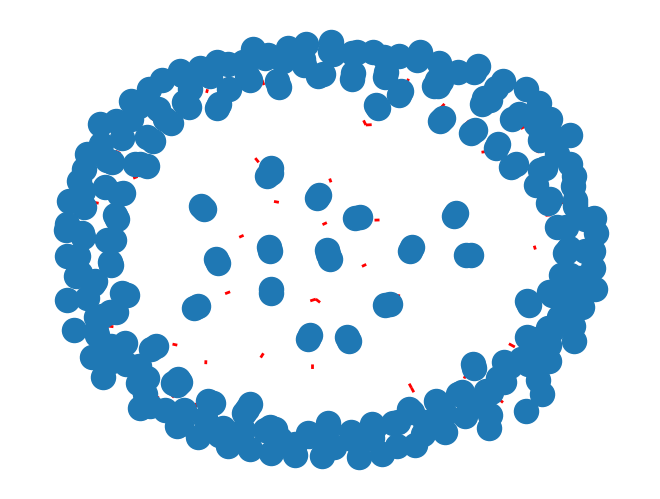

In [47]:
nx.draw(G, with_labels=False)
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), edge_color='r', width=2)
plt.show()

In [16]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [17]:
tracks[tracks['id_artists'].str.contains('6eUKZXaKkcviH0Ku9w2n3V')]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
84093,1VdZ0vKfR5jneCmWIUAMxK,The A Team,77,258373,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.642,0.289,9,-9.918,1,0.0367,0.6690,0.000000,0.1800,0.407,84.996,4
84147,0SuG9kyzGRpDqrCWtgD6Lq,Give Me Love,74,526387,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.526,0.328,1,-9.864,1,0.0461,0.6940,0.000000,0.1120,0.110,116.068,4
84163,0Tel1fmuCxEFV6wBLXsEdk,Kiss Me,73,280853,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.589,0.227,2,-16.670,1,0.0498,0.6400,0.004690,0.0248,0.182,74.993,4
84165,5ubHAQtKuFfiG4FXfLP804,Lego House,73,185093,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.592,0.637,11,-8.480,1,0.0992,0.5620,0.000000,0.1300,0.565,159.701,4
84352,4RnCPWlBsY7oUDdyruod7Y,Drunk,67,200093,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.733,0.652,7,-9.101,1,0.0696,0.4190,0.000002,0.5210,0.459,99.998,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558989,51Be0m3caz9EourH3LIHvY,Drunk,44,200093,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.733,0.652,7,-9.101,1,0.0696,0.4190,0.000002,0.5210,0.459,99.998,4
559011,25PFoRgpgwr2QKzbjl30tl,"You Need Me, I Don't Need You",37,220413,1,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.749,0.837,7,-8.837,1,0.0512,0.1620,0.000000,0.5250,0.927,103.483,4
559027,2sKgjO8vxk7znTpwNAptaW,Small Bump,43,259413,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2011-09-09,0.810,0.436,10,-12.683,1,0.0717,0.6890,0.000151,0.1100,0.446,119.973,4
575396,4THoSHxiabL1rd59iVWu2T,Cold Coffee,54,254227,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2014-06-23,0.544,0.529,6,-6.753,1,0.0256,0.4530,0.000000,0.1310,0.403,92.936,4
